<a href="https://colab.research.google.com/github/Meatlf/LAB/blob/master/Canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
from IPython.display import Image
#uploaded = files.upload()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np

In [23]:
img = plt.imread('lena.jpg')

sigma1 = sigma2 = 1
sum = 0

gaussian = np.zeros([5, 5])
for i in range(5):
    for j in range(5):
        gaussian[i,j] = math.exp(-1/2 * (np.square(i-3)/np.square(sigma1)  #生成二维高斯分布矩阵
                        + (np.square(j-3)/np.square(sigma2)))) / (2*math.pi*sigma1*sigma2)
        sum = sum + gaussian[i, j]
        
gaussian = gaussian/sum
print(gaussian)

[[2.21670366e-05 2.70049789e-04 1.21027919e-03 1.99541304e-03
  1.21027919e-03]
 [2.70049789e-04 3.28987993e-03 1.47442189e-02 2.43091074e-02
  1.47442189e-02]
 [1.21027919e-03 1.47442189e-02 6.60790048e-02 1.08945861e-01
  6.60790048e-02]
 [1.99541304e-03 2.43091074e-02 1.08945861e-01 1.79621358e-01
  1.08945861e-01]
 [1.21027919e-03 1.47442189e-02 6.60790048e-02 1.08945861e-01
  6.60790048e-02]]


In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

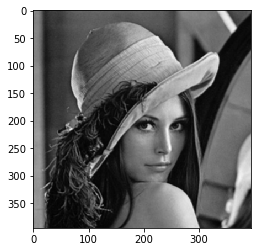

In [26]:
# step1.高斯滤波
gray = rgb2gray(img)
W, H = gray.shape
new_gray = np.zeros([W-5, H-5])
for i in range(W-5):
    for j in range(H-5):
        new_gray[i,j] = np.sum(gray[i:i+5,j:j+5]*gaussian)   # 与高斯矩阵卷积实现滤波 

plt.imshow(new_gray, cmap="gray")

In [0]:
# step2.增强 通过求梯度幅值
W1, H1 = new_gray.shape
dx = np.zeros([W1-1, H1-1])
dy = np.zeros([W1-1, H1-1])
d = np.zeros([W1-1, H1-1])
for i in range(W1-1):
    for j in range(H1-1):   
        dx[i,j] = new_gray[i, j+1] - new_gray[i, j]
        dy[i,j] = new_gray[i+1, j] - new_gray[i, j]        
        d[i, j] = np.sqrt(np.square(dx[i,j]) + np.square(dy[i,j]))   # 图像梯度幅值作为图像强度值
         
# plt.imshow(d, cmap="gray")
      
        
# setp3.非极大值抑制 NMS
W2, H2 = d.shape
NMS = np.copy(d)
NMS[0,:] = NMS[W2-1,:] = NMS[:,0] = NMS[:, H2-1] = 0
for i in range(1, W2-1):
    for j in range(1, H2-1):
        
        if d[i, j] == 0:
            NMS[i, j] = 0
        else:
            gradX = dx[i, j]
            gradY = dy[i, j]
            gradTemp = d[i, j]
            
            # 如果Y方向幅度值较大
            if np.abs(gradY) > np.abs(gradX):
                weight = np.abs(gradX) / np.abs(gradY)
                grad2 = d[i-1, j]
                grad4 = d[i+1, j]
                # 如果x,y方向梯度符号相同
                if gradX * gradY > 0:
                    grad1 = d[i-1, j-1]
                    grad3 = d[i+1, j+1]
                # 如果x,y方向梯度符号相反
                else:
                    grad1 = d[i-1, j+1]
                    grad3 = d[i+1, j-1]
                    
            # 如果X方向幅度值较大
            else:
                weight = np.abs(gradY) / np.abs(gradX)
                grad2 = d[i, j-1]
                grad4 = d[i, j+1]
                # 如果x,y方向梯度符号相同
                if gradX * gradY > 0:
                    grad1 = d[i+1, j-1]
                    grad3 = d[i-1, j+1]
                # 如果x,y方向梯度符号相反
                else:
                    grad1 = d[i-1, j-1]
                    grad3 = d[i+1, j+1]
        
            gradTemp1 = weight * grad1 + (1-weight) * grad2
            gradTemp2 = weight * grad3 + (1-weight) * grad4
            if gradTemp >= gradTemp1 and gradTemp >= gradTemp2:
                NMS[i, j] = gradTemp
            else:
                NMS[i, j] = 0
        
# plt.imshow(NMS, cmap = "gray")


# step4. 双阈值算法检测、连接边缘
W3, H3 = NMS.shape
DT = np.zeros([W3, H3])               
# 定义高低阈值
TL = 0.2 * np.max(NMS)
TH = 0.3 * np.max(NMS)
for i in range(1, W3-1):
    for j in range(1, H3-1):
        if (NMS[i, j] < TL):
            DT[i, j] = 0
        elif (NMS[i, j] > TH):
            DT[i, j] = 1
        elif ((NMS[i-1, j-1:j+1] < TH).any() or (NMS[i+1, j-1:j+1]).any() 
              or (NMS[i, [j-1, j+1]] < TH).any()):
            DT[i, j] = 1
        
plt.imshow(DT, cmap = "gray")